**2. Use RBF, Polynomial and Sigmoid kernel with SVM and compare the performance of the kernels using suitable multiclass data set.**

**What is Kernel Function?**

Kernel Function is used to transform n-dimensional input to m-dimensional input, where m is much higher than n

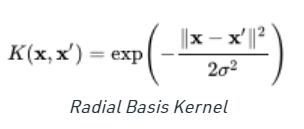
**Why Radial Basis Kernel Is much powerful?**

The main motive of the kernel is to do calculations in any d-dimensional space where d > 1, so that we can get a quadratic, cubic or any polynomial equation of large degree for our classification/regression line. Since Radial basis kernel uses exponent and as we know the expansion of e^x gives a polynomial equation of infinite power, so using this kernel, we make our regression/classification line infinitely powerful too.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('glass.csv')

In [4]:
df.describe()


,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [9]:
X = df.drop(['Type'],axis=1)

In [11]:
Y = df['Type']

In [13]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state = 100)

In [20]:
from sklearn import svm
from sklearn.svm import SVC

In [22]:
model1 = SVC(kernel='rbf')
model2 = SVC(kernel = 'poly')
model3 = SVC(kernel = 'sigmoid')

In [23]:
model1.fit(X_train, Y_train)

SVC()

In [24]:
model2.fit(X_train,Y_train)

SVC(kernel='poly')

In [32]:
model3.fit(X_train, Y_train)

SVC(kernel='sigmoid')

In [34]:
Y_pred1 = model1.predict(X_test)
print(Y_pred1)


[2 3 2 2 2 2 2 1 7 2 2 3 7 2 2 1 3 1 1 2 3 7 2 7 2 1 7 1 2 1 2 2 1 1 3 7 2
 2 2 2 2 3 1]


In [35]:
Y_pred2 = model2.predict(X_test)
print(Y_pred2)

[2 3 3 2 2 2 2 1 6 2 2 5 7 2 2 1 5 1 1 2 5 7 2 7 2 1 7 1 2 1 2 2 1 1 3 7 3
 2 2 2 3 5 1]


In [36]:
Y_pred3 = model3.predict(X_test)
print(Y_pred3)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 1 2 1 2 2 1 1 2 2 2
 2 2 2 2 2 1]


In [37]:
from sklearn.metrics import accuracy_score, classification_report

In [38]:
accuracy_score(Y_test, Y_pred1)

0.813953488372093

In [39]:
accuracy_score(Y_test, Y_pred2)

0.9534883720930233

In [40]:
accuracy_score(Y_test, Y_pred3)

0.6046511627906976

In [42]:
print(classification_report(Y_test,Y_pred1))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.90      1.00      0.95        19
           3       0.17      0.33      0.22         3
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         1
           7       0.83      1.00      0.91         5

    accuracy                           0.81        43
   macro avg       0.48      0.56      0.51        43
weighted avg       0.74      0.81      0.77        43



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
print(classification_report(Y_test, Y_pred2))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      0.95      0.97        19
           3       0.60      1.00      0.75         3
           5       1.00      0.80      0.89         5
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         5

    accuracy                           0.95        43
   macro avg       0.93      0.96      0.94        43
weighted avg       0.97      0.95      0.96        43



In [44]:
print(classification_report(Y_test, Y_pred3))

              precision    recall  f1-score   support

           1       1.00      0.70      0.82        10
           2       0.53      1.00      0.69        19
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         5

    accuracy                           0.60        43
   macro avg       0.25      0.28      0.25        43
weighted avg       0.47      0.60      0.50        43



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
import plotly.express as px

In [56]:
fig1 = px.scatter_3d(df, x='Na', y='Mg', z='Type', color='Type')

In [57]:
fig1.show()